In [1]:
!pip install opencv-python

In [2]:
!pip install opencv-contrib-python

In [3]:
!pip install deepface

In [4]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [5]:
import cv2

In [6]:
img=cv2.imread("C:/Users/Aryan Bansal/Downloads/happyboy.jpeg")

In [7]:
import matplotlib.pyplot as plt

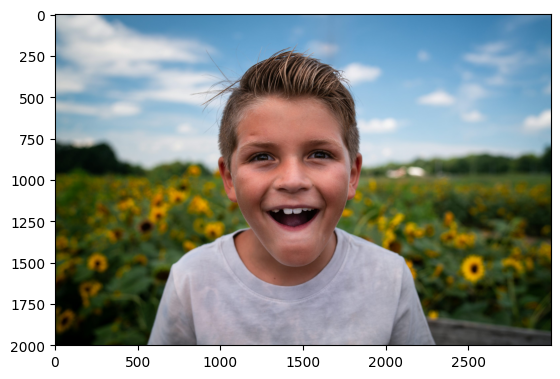

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
# !pip install tf-keras

In [10]:
import tensorflow as tf
from deepface import DeepFace

In [11]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.88s/it]


In [12]:
predictions

[{'emotion': {'angry': 1.2172701735480018e-08,
   'disgust': 1.2703108794411313e-18,
   'fear': 1.2543603308823315e-10,
   'happy': 99.99454021453857,
   'sad': 2.845840008092182e-07,
   'surprise': 1.546541028574211e-05,
   'neutral': 0.005443253758130595},
  'dominant_emotion': 'happy',
  'region': {'x': 959,
   'y': 479,
   'w': 942,
   'h': 942,
   'left_eye': (1575, 856),
   'right_eye': (1260, 870)},
  'face_confidence': 0.91,
  'age': 23,
  'gender': {'Woman': 35.800084471702576, 'Man': 64.19991850852966},
  'dominant_gender': 'Man',
  'race': {'asian': 1.9862044602632523,
   'indian': 2.0221583545207977,
   'black': 0.5988278426229954,
   'white': 37.34894096851349,
   'middle eastern': 9.308125078678131,
   'latino hispanic': 48.73574078083038},
  'dominant_race': 'latino hispanic'}]

In [13]:
predictions[0]['dominant_emotion']

'happy'

In [14]:
import cv2

# Make sure to provide the correct path to the XML file
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [15]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)

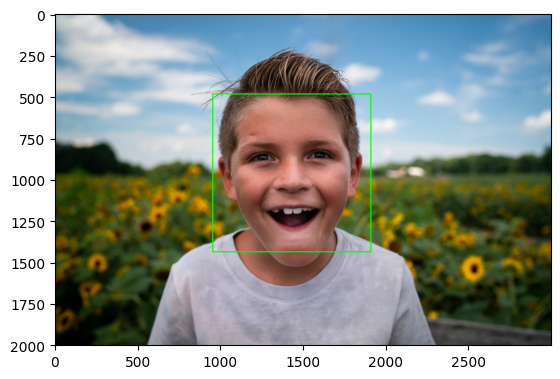

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [17]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,predictions[0]['dominant_emotion'],(150,500),font,10,(0,0,255),5,cv2.LINE_4);

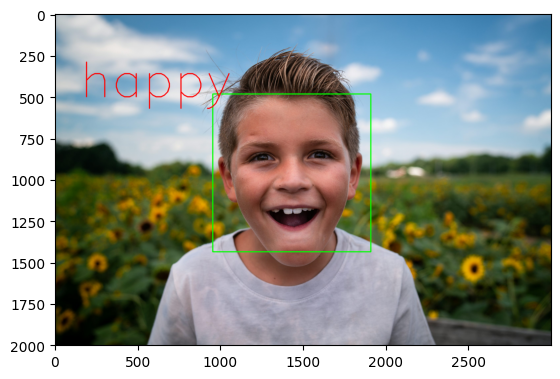

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam!")

while True:
    ret, frame = cap.read()
    
    # Set enforce_detection=False to prevent errors when no face is detected
    try:
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        dominant_emotion = result[0]['dominant_emotion']
    except ValueError:
        dominant_emotion = "No Face Detected"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 5)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, dominant_emotion, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow('Demo Video', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
